In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [2]:
df = pd.read_csv('asylum_cases_structure.csv')

In [3]:
year_series = df['year'].value_counts()

In [4]:
year_df = year_series.to_frame()

In [5]:
year_df.reset_index(level=0, inplace=True)


In [6]:
year_df.set_axis(['Year', 'Count'], axis=1, inplace=True)


In [7]:
year_df.sort_values(by=['Year'], inplace= True)


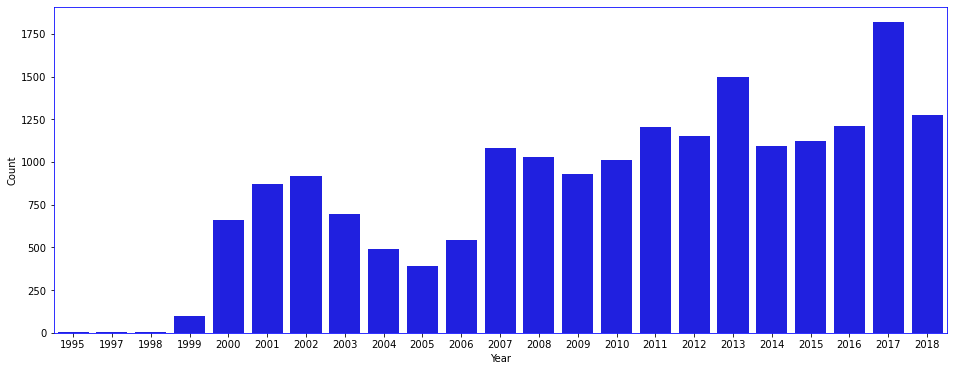

In [8]:
#Plot number of cases per year

plt.figure(figsize=(16, 6))

ax = sns.barplot(x= "Year" , y = 'Count', data = year_df, color = "b")
ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')
ax.spines['left'].set_color('blue')
ax.spines['right'].set_color('blue')



In [9]:
def get_len(text):
    if isinstance(text, str):
        if len(text) < 2:
            return 0
        else:
            words = nltk.word_tokenize(text)
            words=[word.lower() for word in words if word.isalpha()]
            return len(words)
    else:
        return 0

In [10]:
df['Summary Length'] = df.summary.apply(get_len)

In [11]:
len(df[df['Summary Length'] > 750])

50

In [12]:
indices = df[df['Summary Length'] > 750].index

In [13]:
df.drop(index=indices, inplace = True)

In [14]:
df.reset_index(inplace=True)

Text(0.5, 0, 'Number of Words in Summary')

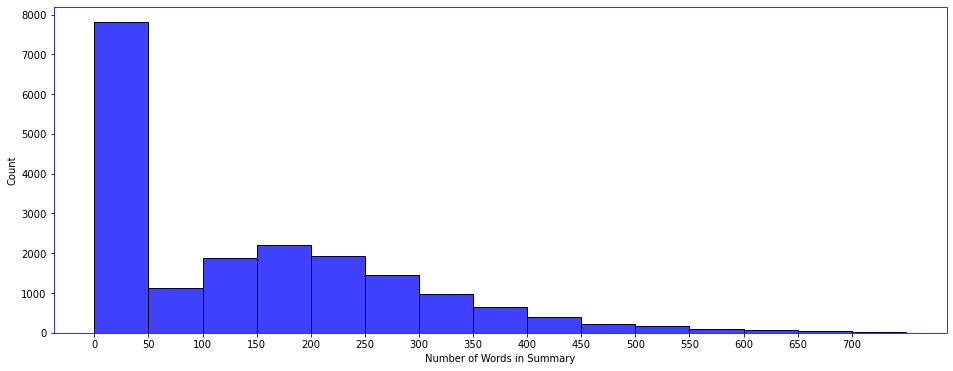

In [15]:
#Plot Summary lengths

plt.figure(figsize=(16, 6))
ax = sns.histplot(df["Summary Length"],   color = "b", binwidth = 50)
plt.xticks([*range(0, 750, 50)])
ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')
ax.spines['left'].set_color('blue')
ax.spines['right'].set_color('blue')
plt.xlabel('Number of Words in Summary')

In [ ]:
df['Verdict Length'] = df.verdict.apply(get_len)

In [ ]:
df.drop(columns=['index'], inplace= True)

In [ ]:
#df.to_csv("december_verdict_length.csv")

In [16]:
df = pd.read_csv('december_verdict_length.csv', lineterminator='\n', index_col=0)

In [17]:
indices = df[df['Verdict Length'] > 5000].index

In [18]:
df.drop(index=indices, inplace = True)

In [19]:
df.reset_index(inplace = True)

Text(0.5, 0, 'Number of Words in Case Text')

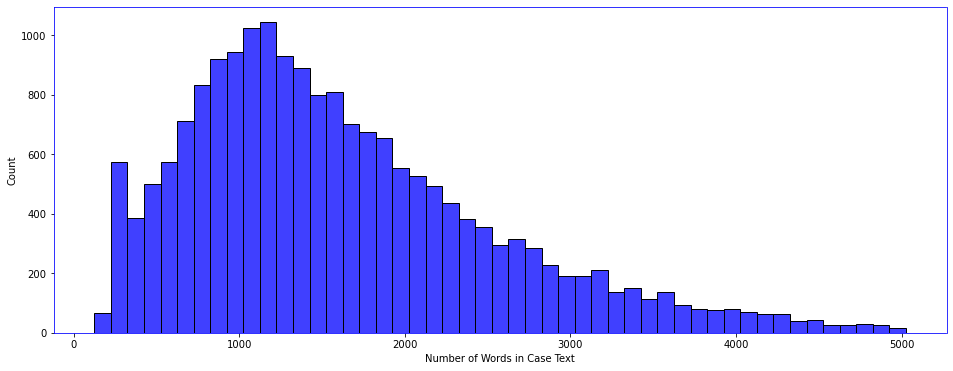

In [20]:
#Plot Verdict Lengths

plt.figure(figsize=(16, 6))

ax = sns.histplot(df["Verdict Length"],   color = "b", binwidth = 100)
ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')
ax.spines['left'].set_color('blue')
ax.spines['right'].set_color('blue')
plt.xlabel('Number of Words in Case Text')

In [21]:
median_df = df.groupby('year').median()

In [22]:
median_df = median_df.drop(columns=['index', 'structured','Summary Length'])

In [23]:
median_df.reset_index(level=0, inplace=True)


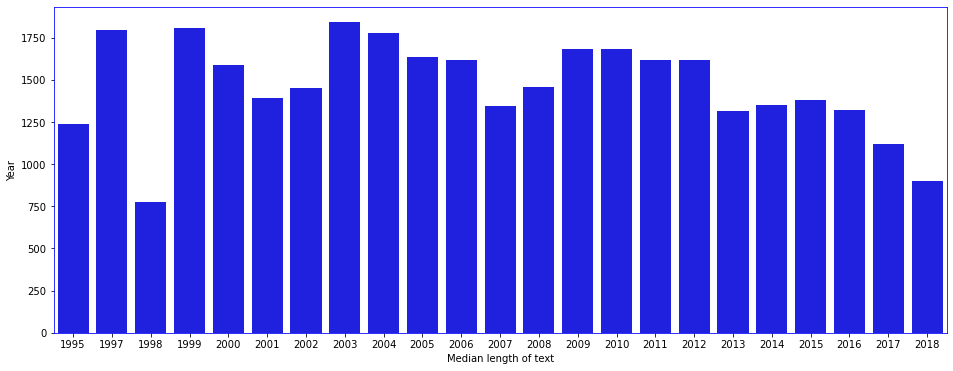

In [24]:
#Plot Median length per year 

plt.figure(figsize=(16, 6))

#ax = sns.barplot(x= "Year" , y = 'Count', data = year_df, palette = "mako")
ax = sns.barplot(x= "year" , y = 'Verdict Length', data = median_df, color = "b")
ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')
ax.spines['left'].set_color('blue')
ax.spines['right'].set_color('blue')
ax.set(xlabel='Median length of text', ylabel='Year')
plt.xlabel = "Year"
# for p in ax.patches:
#              ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
#                  ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
#                  textcoords='offset points')
# _ = g.set_ylim(0,120) #To make space for the annotations